In [105]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

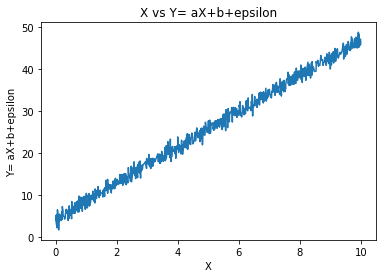

In [106]:

a= 10*np.random.rand()
b= 10*np.random.rand()
epsilon = np.random.normal(0,1,1000)
x = np.random.uniform(0,10,1000)

y =  a*x + b + epsilon
# line from seaborn
sns.lineplot(x,y)
plt.title('X vs Y= aX+b+epsilon')
plt.xlabel('X')
plt.ylabel('Y= aX+b+epsilon')
plt.show()

In [107]:


class LinearRegression:
    def Hypothesis(self,x,W):
        '''
        Function to calculate the Hypothesis ie h(x) = W0 + W1*x1 + W2*x2 + ... + Wn*xn
        x: input data
        W: parameters
        return: Hypothesis
        '''
        return np.dot(x,W.T)

    def Cost(self,x,y,W):
        '''
        Function to calculate the cost function
        x: input data
        y: output data
        W: parameters
        return: cost function
        '''
        m = len(x) # number of training examples
        J = (1/(2*m))*np.sum((self.Hypothesis(x,W)-y)**2)
        return J
        
    ## Define gradient descent for linear regression
    def GradientDescent(self,x, y, W, learn_rate, epochs):
        '''
        Function to calculate the gradient descent
        x: input data
        y: output data
        W: parameters
        learn_rate: learning rate
        epochs: number of iterations
        return: parameters
        '''
        m = len(x)
        J_values=[]
        epochs_values=[]
        for i in range(epochs):
            W = W - (learn_rate/m)*(x.T)@(self.Hypothesis(x,W)-y)
            J_values.append(self.Cost(x,y,W))
            epochs_values.append(i)
        plt.plot(epochs_values,J_values)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        return W


class Ridge_Regularization:
    def Hypothesis(self,x,W):
        '''
        Function to calculate the Hypothesis ie h(x) = W0 + W1*x1 + W2*x2 + ... + Wn*xn
        x: input data
        W: parameters
        return: Hypothesis
        '''
        return np.dot(x,W.T)

    def Cost(self,x,y,W,lamda):
        '''
        Function to calculate the cost function
        x: input data
        y: output data
        W: parameters
        lamda: regularization parameter
        return: cost function
        '''
        m = len(x)
        J = (1/(2*m))*np.sum((self.Hypothesis(x,W)-y)**2) + (lamda/(2*m))*np.sum(W**2)
        return J
    
    def GradientDescent(self,x, y, W, learn_rate, epochs,lamda):
        '''
        Function to calculate the gradient descent
        x: input data
        y: output data
        W: parameters
        learn_rate: learning rate
        epochs: number of iterations
        lamda: regularization parameter
        return: parameters
        '''
        m = len(x)
        J_values=[]
        epochs_values=[]
        for i in range(epochs):
            z= (x.T)@(self.Hypothesis(x,W)-y) + lamda*W
            z= z.T
            W = W - (learn_rate/m)*z
            W[0]=W[0]+lamda*W[0]*(learn_rate)/m
            J_values.append(self.Cost(x,y,W,lamda))
            epochs_values.append(i)
        plt.plot(epochs_values,J_values)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        return W
class Lasso_Regularization:
    def Hypothesis(self,x,W):
        '''
        Function to calculate the Hypothesis ie h(x) = W0 + W1*x1 + W2*x2 + ... + Wn*xn
        x: input data
        W: parameters
        return: Hypothesis
        '''
        return np.dot(x,W.T)

    def Cost(self,x,y,W,lamda):
        '''
        Function to calculate the cost function
        x: input data
        y: output data
        W: parameters
        lamda: regularization parameter
        return: cost function
        '''
        m = len(x)
        J = (1/(2*m))*np.sum((self.Hypothesis(x,W)-y)**2) + (lamda/(2*m))*np.sum(np.abs(W))
        return J
    
    def GradientDescent(self,x, y, W, learn_rate, epochs,lamda):
        '''
        Function to calculate the gradient descent
        x: input data
        y: output data
        W: parameters
        learn_rate: learning rate
        epochs: number of iterations
        lamda: regularization parameter
        return: parameters
        '''
        m = len(x)
        J_values=[]
        epochs_values=[]
        for i in range(epochs):
            z= (x.T)@(self.Hypothesis(x,W)-y) + lamda*np.sign(W)
            z= z.T
            W = W - (learn_rate/m)*z
            W[0]=W[0]+lamda*np.sign(W[0])*(learn_rate)/m
            J_values.append(self.Cost(x,y,W,lamda))
            epochs_values.append(i)
        plt.plot(epochs_values,J_values)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        return W
    
class Elastic_Regularization:
    def Hypothesis(self,x,W):
        '''
        Function to calculate the Hypothesis ie h(x) = W0 + W1*x1 + W2*x2 + ... + Wn*xn
        x: input data
        W: parameters
        return: Hypothesis
        '''
        return np.dot(x,W.T)
    
    def Cost(self,x,y,W,lamda):
        '''
        Function to calculate the cost function
        x: input data
        y: output data
        W: parameters
        lamda: regularization parameter
        return: cost function
        '''
        m = len(x)
        J = (1/(2*m))*np.sum((self.Hypothesis(x,W)-y)**2) + (lamda/(2*m))*np.sum(np.abs(W)) + ((lamda/(2*m))*np.sum(W**2))
        return J
    
    def GradientDescent(self,x, y, W, learn_rate, epochs,lamda):
        '''
        Function to calculate the gradient descent
        x: input data
        y: output data
        W: parameters
        learn_rate: learning rate
        epochs: number of iterations
        lamda: regularization parameter
        return: parameters
        '''
        m = len(x)
        J_values=[]
        epochs_values=[]
        for i in range(epochs):
            z= (x.T)@(self.Hypothesis(x,W)-y) + lamda*np.sign(W) + lamda*W
            z= z.T
            W = W - (learn_rate/m)*z
            W[0]=W[0]+lamda*np.sign(W[0])*(learn_rate)/m + lamda*W[0]*(learn_rate)/m
            J_values.append(self.Cost(x,y,W,lamda))
            epochs_values.append(i)
        plt.plot(epochs_values,J_values)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        return W
    
## Creating dataset
def GenerateData(degree,x): 
    '''
    Function to create the dataset
    degree: degree of the polynomial
    x: input data
    return: dataset
    '''
    return [x**i for i in range(degree+1)]


In [108]:

LR = LinearRegression()
RR= Ridge_Regularization()
LRR= Lasso_Regularization()
ELR= Elastic_Regularization()



In [109]:
degree =10
X_data = create_points(degree,x)
X_data = np.array(X_data).T
Y_data = y
theta = 10*abs((np.random.randn(degree+1)))
X_data = (X_data-np.mean(X_data))/np.std(X_data)
Y_data = (Y_data - np.mean(Y_data))/np.std(Y_data)
X_data, X_test, Y_data, Y_test = train_test_split(X_data, Y_data, test_size=0.2)

Without Regularisation

The value of cost function without regularization:  2.864903366899974


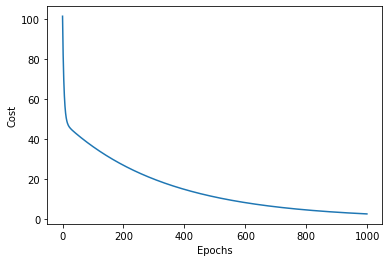

In [110]:
theta_new = gradient_descent(X_data,Y_data,theta,0.01,1000)
total_loss = cost_function(X_test,Y_test,theta_new)
print("The value of cost function without regularization: ",total_loss)

RIDGE REGULARISATION

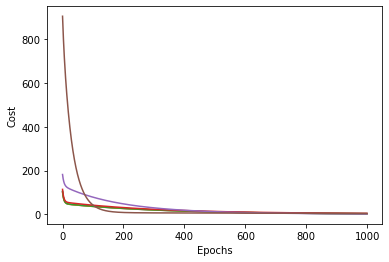

In [111]:
k = 6
lamda_values = np.array([0.01,0.1,1,10,100,1000])
theta_values = np.zeros(degree+1)
total_cost=[]
theta_all= np.zeros([k,degree+1])
for i in range(k):
    lamda = lamda_values[i]
    train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size=1/k)
    theta_new = RR.GradientDescent(train_x,train_y,theta,0.01,1000,lamda)
    theta_all[i]=theta_new
    theta_values = theta_values + theta_new/k
    total_cost.append(RR.Cost(test_x,test_y,theta_new,lamda))

In [112]:
total_cost = np.array(total_cost)
log_lamda = []
for i in range(k):
    log_lamda.append(np.log(lamda_values[i]))
log_lamda=np.array(log_lamda)

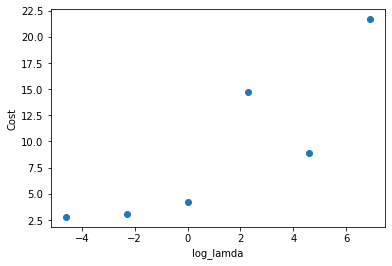

The best lamda for ridge regularization :  0.01


In [113]:
plt.plot(log_lamda,total_cost,'o')
plt.xlabel("log_lamda")
plt.ylabel("Cost")
plt.show()
min_loss=total_cost[0]
best_lamda=lamda_values[0]
for i in range(1,k):
    if total_cost[i]<min_loss:
        min_loss=total_cost[i]
        best_lamda=lamda_values[i]
print("The best lamda for ridge regularization : ", best_lamda)

The value of cost function after using ridge regulariation :  2.8756424299224688


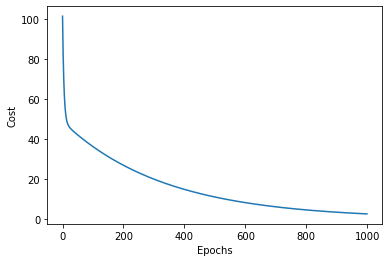

In [114]:
## Implementing the model after finding the best lamda
theta_best = RR.GradientDescent(X_data,Y_data,theta,0.01,1000,best_lamda)
print("The value of cost function after using ridge regulariation : ",RR.Cost(X_test,Y_test,theta_best,best_lamda))

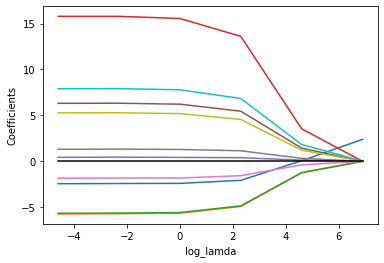

In [115]:
theta_all =theta_all.T
for i in range(10):
    plt.plot(log_lamda, np.array(theta_all[i]), linestyle='solid')
plt.plot(log_lamda,np.zeros(6),'black')
plt.xlabel("log_lamda")
plt.ylabel("Coefficients")
plt.show()

LASSO REGULARIZATION

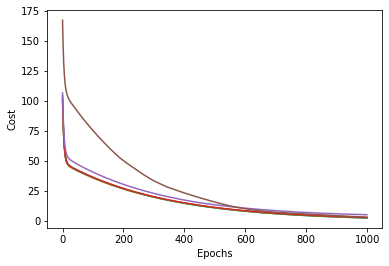

In [116]:
k = 6
lamda_values = np.array([0.01,0.1,1,10,100,1000])
theta_values = np.zeros(degree+1)
total_cost=[]
theta_all= np.zeros([k,degree+1])
for i in range(k):
    lamda = lamda_values[i]
    train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size=1/k)
    theta_new = LRR.GradientDescent(train_x,train_y,theta,0.01,1000,lamda)
    theta_all[i]=theta_new
    theta_values = theta_values + theta_new/k
    total_cost.append(LRR.Cost(test_x,test_y,theta_new,lamda))

total_cost = np.array(total_cost)
log_lamda = []
for i in range(k):
    log_lamda.append(np.log(lamda_values[i]))
log_lamda=np.array(log_lamda)



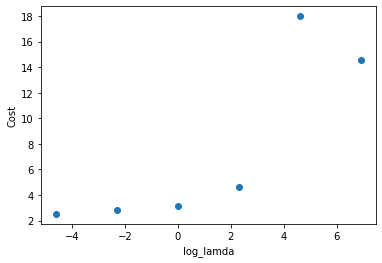

The best lamda for lasso regularization :  0.01


In [117]:
plt.plot(log_lamda,total_cost,'o')
plt.xlabel("log_lamda")
plt.ylabel("Cost")
plt.show()
min_loss=total_cost[0]
best_lamda=lamda_values[0]
for i in range(1,k):
    if total_cost[i]<min_loss:
        min_loss=total_cost[i]
        best_lamda=lamda_values[i]
print("The best lamda for lasso regularization : ", best_lamda)

The value of cost function after using lasso regulariation :  2.8661679567772893



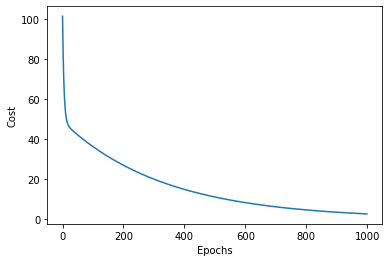

In [118]:
## Implementing the model after finding the best lamda
theta_best = LRR.GradientDescent(X_data,Y_data,theta,0.01,1000,best_lamda)
print("The value of cost function after using lasso regulariation : ",LRR.Cost(X_test,Y_test,theta_best,best_lamda))
print()

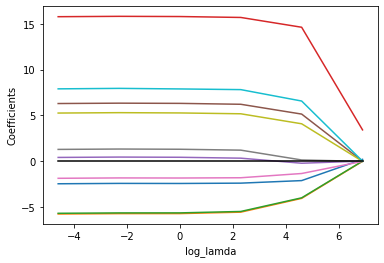

In [119]:
theta_all =theta_all.T
for i in range(10):
    plt.plot(log_lamda, np.array(theta_all[i]), linestyle='solid')
plt.plot(log_lamda,np.zeros(6),'black')
plt.xlabel("log_lamda")
plt.ylabel("Coefficients")
plt.show()

ELASTIC REGULARIZATION

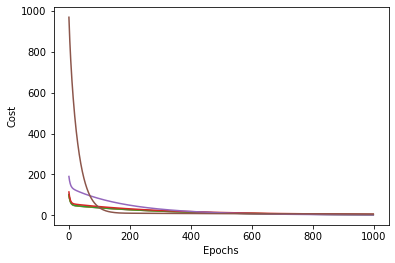

In [120]:
k = 6
lamda_values = np.array([0.01,0.1,1,10,100,1000])
theta_values = np.zeros(degree+1)
total_cost=[]
theta_all= np.zeros([k,degree+1])
for i in range(k):
    lamda = lamda_values[i]
    train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size=1/k)
    theta_new = ELR.GradientDescent(train_x,train_y,theta,0.01,1000,lamda)
    theta_all[i]=theta_new
    theta_values = theta_values + theta_new/k
    total_cost.append(ELR.Cost(test_x,test_y,theta_new,lamda))

total_cost = np.array(total_cost)
log_lamda = []
for i in range(k):
    log_lamda.append(np.log(lamda_values[i]))
log_lamda=np.array(log_lamda)


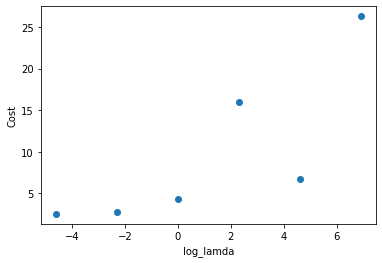

The best lamda for elastic regularization :  0.01


In [121]:
plt.plot(log_lamda,total_cost,'o')
plt.xlabel("log_lamda")
plt.ylabel("Cost")
plt.show()
min_loss=total_cost[0]
best_lamda=lamda_values[0]
for i in range(1,k):
    if total_cost[i]<min_loss:
        min_loss=total_cost[i]
        best_lamda=lamda_values[i]
print("The best lamda for elastic regularization : ", best_lamda)

The value of cost function after using elastic regulariation :  2.876906597525983


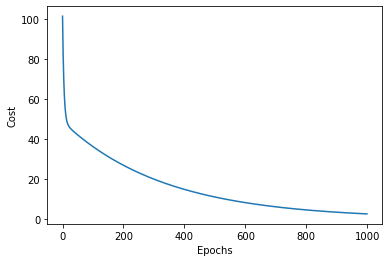

In [122]:
## Implementing the model after finding the best lamda
theta_best = ELR.GradientDescent(X_data,Y_data,theta,0.01,1000,best_lamda)
print("The value of cost function after using elastic regulariation : ",ELR.Cost(X_test,Y_test,theta_best,best_lamda))

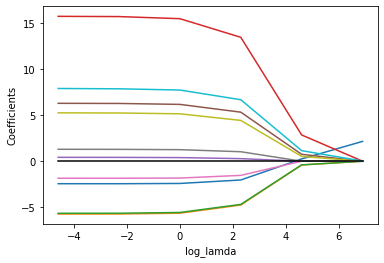

In [123]:
theta_all=theta_all.T
for i in range(10):
    plt.plot(log_lamda, np.array(theta_all[i]), linestyle='solid')
plt.plot(log_lamda,np.zeros(6),'black')
plt.xlabel("log_lamda")
plt.ylabel("Coefficients")
plt.show()
